# Titanic Surviving Prediction - Deep Learning

## Importing Necessary Libraries

In [463]:
import pandas as pd
pd.set_option("display.max_columns",100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [464]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Loading the Datasets

In [465]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

## EDA

In [466]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [467]:
df = df1.append(df2) # we add to each other, we will do the necessary operations and then we will separate them.

In [468]:
df.shape

(1309, 12)

In [469]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
345,1237,NaN,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S
645,646,1.0,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
191,1083,NaN,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
528,529,0.0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
333,1225,NaN,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
216,217,1.0,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
260,261,0.0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
168,1060,NaN,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
285,1177,NaN,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [471]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [472]:
# We got the titles using Regular Expression
df["Title"] = df["Name"].str.extract("(\S+)\.", expand = False)
#df["Title2"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand = False)

In [473]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Sir           1
Lady          1
Mme           1
Countess      1
Don           1
Dona          1
Jonkheer      1
Capt          1
Name: Title, dtype: int64

In [474]:
df["Title"] = df["Title"].replace(["Ms", "Mlle"], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")

In [475]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [476]:
df.groupby("Sex")["Age"].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [477]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [478]:
# We fill in the blanks according to the title
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace = True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [480]:
del df["Cabin"] # We delete it because the total number of data is below 20%

In [481]:
df["Embarked"].value_counts() # we'll fill in the blanks with the most Embarked

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [482]:
df["Embarked"].value_counts(normalize=True) # Since 70% is a high rate, we fill both spaces with S.

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [483]:
df["Embarked"].fillna("S", inplace = True) # We fill it with S

In [484]:
df["Fare"].fillna(df["Fare"].mean(), inplace = True)  # We fill the single space in Mouse with the average

In [485]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [486]:
df["FamilySize"].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [488]:
del df["Name"]

In [489]:
df.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   object 
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   object 
 8   Title       1309 non-null   object 
 9   FamilySize  1309 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


In [491]:
df_temp = pd.get_dummies(df, drop_first = True)

In [492]:
df_train = df_temp[:891]
df_test = df_temp[891:]

In [493]:
df_train.shape, df_test.shape

((891, 13), (418, 13))

In [494]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


## Modeling and Predicting

In [495]:
y = df_train["Survived"]
del df_train["Survived"]

In [496]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [497]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.09),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [498]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [499]:
history = model.fit(df_train,y, epochs = 250, validation_split = 0.1, verbose = 1)

Epoch 1/250
26/26 [==============================] - 1s 9ms/step - loss: 0.7395 - accuracy: 0.6479 - val_loss: 0.7403 - val_accuracy: 0.6222
Epoch 2/250
26/26 [==============================] - 0s 4ms/step - loss: 0.7721 - accuracy: 0.6554 - val_loss: 0.5766 - val_accuracy: 0.6889
Epoch 3/250
26/26 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6542 - val_loss: 0.5860 - val_accuracy: 0.6222
Epoch 4/250
26/26 [==============================] - 0s 4ms/step - loss: 0.6180 - accuracy: 0.6504 - val_loss: 0.4953 - val_accuracy: 0.7333
Epoch 5/250
26/26 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6904 - val_loss: 0.5110 - val_accuracy: 0.7222
Epoch 6/250
26/26 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.6779 - val_loss: 0.4968 - val_accuracy: 0.7444
Epoch 7/250
26/26 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.7041 - val_loss: 0.4674 - val_accuracy: 0.8333
Epoch 8/250
2

26/26 [==============================] - 0s 5ms/step - loss: 0.3802 - accuracy: 0.8390 - val_loss: 0.3701 - val_accuracy: 0.8667
Epoch 116/250
26/26 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8252 - val_loss: 0.3161 - val_accuracy: 0.8444
Epoch 117/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8390 - val_loss: 0.3358 - val_accuracy: 0.8333
Epoch 118/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8315 - val_loss: 0.3611 - val_accuracy: 0.8444
Epoch 119/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3720 - accuracy: 0.8390 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 120/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8390 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 121/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8439 - val_loss: 0.3392 - val_accuracy: 0.8667
Epoch 122/250

26/26 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.8489 - val_loss: 0.4230 - val_accuracy: 0.8111
Epoch 230/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8514 - val_loss: 0.3462 - val_accuracy: 0.8333
Epoch 231/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8689 - val_loss: 0.3632 - val_accuracy: 0.8444
Epoch 232/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8639 - val_loss: 0.3710 - val_accuracy: 0.8667
Epoch 233/250
26/26 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.8627 - val_loss: 0.3538 - val_accuracy: 0.8333
Epoch 234/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8627 - val_loss: 0.3652 - val_accuracy: 0.8667
Epoch 235/250
26/26 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.8627 - val_loss: 0.3285 - val_accuracy: 0.8667
Epoch 236/250

In [500]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 256)               3328      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 256)             

In [501]:
scores = model.evaluate(df_train,y)

28/28 [==============================] - 0s 923us/step - loss: 0.3114 - accuracy: 0.8653


In [502]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.53%


In [503]:
import matplotlib.pyplot as plt
%matplotlib inline

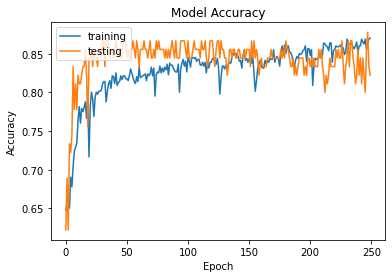

In [504]:
fig1 = plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["training", "testing"], loc = "upper left")

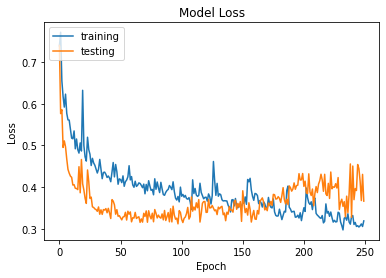

In [505]:
fig1 = plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["training", "testing"], loc = "upper left")

In [506]:
del df_test["Survived"]

In [507]:
pred = model.predict(df_test)

In [508]:
result = df2[["PassengerId"]]

In [509]:
result["Survived"] = pred

In [510]:
result["Survived"] = result["Survived"].apply(int)

In [511]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [512]:
result.to_csv("result.csv", index = False)

In [333]:
df_test.shape

(418, 13)

In [334]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [152]:
del df_test["Survived"]

In [56]:
df_train.shape, df_test.shape

((891, 12), (418, 12))

In [57]:
scores = model.evaluate(df_train, y)

28/28 [==============================] - 0s 923us/step - loss: 0.2637 - accuracy: 0.9035


In [336]:
predict = r.predict(df_test)

In [337]:
result = df2[["PassengerId"]]

In [338]:
result["Survived"] = predict

In [339]:
result["Survived"] = result["Survived"].apply(int)

In [340]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [341]:
result.shape

(418, 2)

In [198]:
result.to_csv("result.csv", index = False)